In [140]:
import matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [141]:
filepath = './archive/voice.csv'
voice_data = pd.read_csv(filepath)
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [142]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [8]:
voice_data.shape

(3168, 21)

In [143]:
missing_values_count = voice_data.isnull().sum()
missing_values_count

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Visualisation

/home/amadou/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


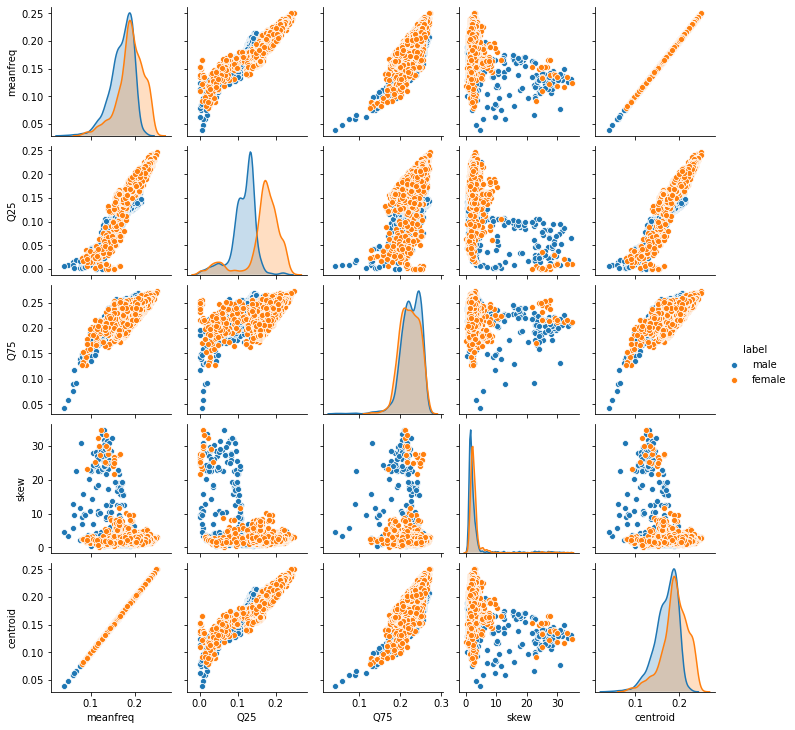

In [173]:
sns.pairplot(voice_data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Preprocessing
### Transformation des male et female en valeur numérique

In [174]:
label_encoder = LabelEncoder()
X = voice_data[voice_data.columns[:-1]]
y = pd.Series(label_encoder.fit_transform(voice_data['label']))
X_prime = X.copy()
X_prime['Q25.2'] = X['Q25'].copy()

In [175]:
X_prime.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Q25.2
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0.015071
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0.019414
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0.008701
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0.096582
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0.078720


### Standardisation de la dataset

In [146]:
standard_scaler = StandardScaler()
features = X.columns.copy()
X_scaled = pd.DataFrame(standard_scaler.fit_transform(X))
X_scaled.columns = X.columns

In [147]:
X_scaled

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


In [118]:
y.tail()

3163    1
3164    1
3165    1
3166    1
3167    1
dtype: int64

In [178]:
train_size = 0.6
validation_size = 0.2
test_size = 0.2
# X normale
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=test_size+validation_size, random_state=1)
X_validation, X_test, y_validation, y_test = train_test_split(X_, y_, test_size=test_size, random_state=1)
# X_scaled
X_scaled_train, X_, _, _ = train_test_split(X_scaled, y, test_size=test_size+validation_size, random_state=1)
X_scaled_validation, X_scaled_test, _ , _ = train_test_split(X_, y_, test_size=test_size, random_state=1)
# X_prime
X_prime_train, X_, _, _ = train_test_split(X_prime, y, test_size=test_size+validation_size, random_state=1)
X_prime_validation, X_prime_test, _ , _ = train_test_split(X_, y_, test_size=test_size, random_state=1)

error


In [150]:
X_train

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2535,0.494398,-1.286165,0.305821,0.839073,-0.432932,-1.193931,-0.135179,-0.193823,-0.848447,-0.793198,0.394472,0.494398,0.530074,0.545812,0.672624,1.726070,-0.461523,1.355745,1.364474,-0.463053
373,0.741352,0.105109,1.299333,-0.126764,0.946790,0.667374,-0.066334,-0.179562,-0.945760,-0.493765,1.051249,0.741352,-1.050676,-0.696040,-3.441757,-0.745943,2.624495,-1.225047,-1.272631,1.026033
1984,0.786941,-1.108222,0.476560,0.782206,0.190332,-0.784849,-0.332408,-0.226750,0.007272,-1.146123,0.305158,0.786941,0.675628,-0.830959,0.410480,0.241758,-0.708404,0.445921,0.458802,-0.968281
162,-0.665993,0.843095,-0.360074,-0.940165,-0.185131,0.967453,4.653150,4.196566,0.556559,0.826942,-1.364546,-0.665993,-2.208478,-1.068075,0.114817,-1.445185,0.279121,-1.413669,-1.419137,-1.454772
122,-0.533136,0.973526,-0.329138,-0.927031,0.473681,1.316528,3.404414,2.664413,0.575592,0.879335,-1.363221,-0.533136,-1.859126,-0.879502,0.260185,-1.407751,0.279121,-1.289400,-1.294829,-0.677306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,0.176552,0.160783,0.277970,0.672404,0.099561,-0.710068,-0.273471,-0.217489,0.604615,0.687555,0.369839,0.176552,0.911347,-0.723944,0.114817,-1.136815,-0.214641,-1.273867,-1.270411,0.226020
2870,0.799478,-1.284758,0.526190,1.015355,0.004656,-1.152726,-0.111447,-0.185753,-0.995791,-0.898070,0.511307,0.799478,0.923622,0.550671,0.672624,-0.132990,-0.461523,-0.168764,-0.160518,-0.518754
178,-1.144069,0.547468,-1.802330,-0.892959,-0.353693,0.820604,-0.284019,-0.218034,0.878534,0.940134,-0.846143,-1.144069,-0.936212,-0.782285,0.565959,-0.495505,-0.708404,-0.397330,-0.384717,0.783778
778,-0.282390,0.117234,-0.191047,-0.590216,-0.457234,0.418924,-0.392979,-0.231643,0.544999,-0.267499,0.577855,-0.282390,-1.600245,-1.064614,-3.233050,-0.916104,0.526003,-0.614800,-0.624454,-0.834225


In [151]:
y_validation

1661    0
3135    0
678     1
1928    0
2080    0
       ..
3134    0
2958    0
2450    0
318     1
118     1
Length: 1014, dtype: int64

In [152]:
X_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1642,-0.156607,0.143460,0.045085,0.308208,-0.420036,-0.582774,-0.404169,-0.239798,1.074821,1.226374,0.584362,-0.156607,0.994805,-0.771392,-0.545946,-0.835991,-0.584964,-0.321881,-0.311464,-0.458287
2303,1.298000,-1.406887,0.885892,1.236323,0.900435,-0.909196,-0.353828,-0.233889,-0.918899,-1.244899,0.452219,1.298000,1.140844,0.543390,0.672624,1.417670,-0.461523,1.302487,1.311200,-0.354151
2718,0.685809,-1.342681,0.379430,0.883959,-0.051628,-1.034319,-0.273108,-0.218102,-0.594438,-1.039147,0.330123,0.685809,0.708743,0.577740,0.410480,1.881492,-0.461523,0.996253,1.004869,-0.249233
2488,1.128452,-1.200339,0.777261,1.223380,0.558236,-1.083548,-0.148472,-0.194156,-1.062192,-0.967521,0.507936,1.128452,0.802161,0.555549,0.672624,0.253639,-0.461523,-0.261966,-0.253750,-0.154080
3118,0.904361,-1.087786,0.504115,0.796655,0.492123,-0.634539,-0.354568,-0.227679,-0.032174,-1.359679,0.491058,0.904361,0.106066,0.377487,0.674092,1.720140,-0.491612,1.061827,1.071005,-0.349270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,-0.105146,0.234110,0.118988,0.365822,-0.231336,-0.544064,-0.299745,-0.210523,0.623473,0.451139,-2.141210,-0.105146,-0.432878,-1.093159,-0.162074,-1.359226,-0.708404,-1.262771,-1.250433,-0.697816
2411,1.318742,-1.462002,0.973312,1.309959,0.532123,-1.196488,-0.193839,-0.207187,-1.434880,-1.274098,0.480846,1.318742,1.175886,0.572774,0.672624,0.348661,-0.461523,1.369059,1.377793,-0.599337
1293,0.024671,0.060961,0.171168,-0.239284,-0.445932,0.025870,-0.288269,-0.217463,0.022156,-0.483407,0.409195,0.024671,-0.993248,0.543390,0.513540,-0.628307,-0.461523,-0.102192,-0.093925,-0.976855
304,0.925149,-0.923683,0.762653,0.893677,0.310946,-0.845041,-0.244833,-0.213131,-0.113703,-1.843751,0.735303,0.925149,0.930049,-0.876919,0.114817,-0.520431,2.624495,-0.341853,-0.389156,-1.269170


In [153]:
print(X_train.shape, X_validation.shape, X_test.shape)

(1900, 20) (1014, 20) (254, 20)


In [154]:
print(f'X_shape = ({X_train.shape[0] + X_validation.shape[0] + X_test.shape[0]}, {X_train.shape[1]})')

X_shape = (3168, 20)


In [155]:
print(f'X_shape = {X.shape}')

X_shape = (3168, 20)


## RandomForestClassifier
### Optimisation des hyper-paramètres

In [72]:
from sklearn.model_selection import GridSearchCV

In [179]:
def n_estimator_optimization(values, X_train, X_validation):
    for n in values:
        rf_model = RandomForestClassifier(n_estimators=n, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For n_estimators={n}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
def max_depth_optimization(values, X_train, X_validation):
    for depth in values:
        rf_model = RandomForestClassifier(max_depth=depth, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For max_depth = {depth}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
def max_features_optimization(values, X_train, X_validation):
    for m in values:
        rf_model = RandomForestClassifier(max_features=m, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For max_features = {m}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
def min_samples_leaf_optimization(values, X_train, X_validation):
    for m in values:
        rf_model = RandomForestClassifier(min_samples_leaf=m, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For max_min_samples_leaf = {m}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
def min_samples_split_optimization(values, X_train, X_validation):
    for m in values:
        rf_model = RandomForestClassifier(min_samples_split=m, random_state=1)
        rf_model.fit(X_train, y_train)
        y_pred =rf_model.predict(X_validation)
        print(f'For min_samples_split = {m}, error = {mean_absolute_error(y_true=y_validation, y_pred=y_pred)}')
        
def grid_search_optimization(d):
    rf_model = RandomForestClassifier()
    grid_search = GridSearchCV(estimator=rf_model, param_grid=d, n_jobs=4, cv=5)
    grid_search.fit(X, y)
    print(grid_search.best_params_)
    
    

### Pour X normal

In [189]:
n_estimator_values = np.arange(50, 30, 25)
n_estimator_optimization(n_estimator_values, X_train, X_validation)

In [180]:
max_depth_values = np.arange(80, 200, 10)
max_depth_optimization(max_depth_values, X_train, X_validation)

For max_depth = 80, error = 0.026627218934911243
For max_depth = 90, error = 0.026627218934911243
For max_depth = 100, error = 0.026627218934911243
For max_depth = 110, error = 0.026627218934911243
For max_depth = 120, error = 0.026627218934911243
For max_depth = 130, error = 0.026627218934911243
For max_depth = 140, error = 0.026627218934911243
For max_depth = 150, error = 0.026627218934911243
For max_depth = 160, error = 0.026627218934911243
For max_depth = 170, error = 0.026627218934911243
For max_depth = 180, error = 0.026627218934911243
For max_depth = 190, error = 0.026627218934911243


In [181]:
max_features_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
max_features_optimization(max_features_values, X_train, X_validation)

For max_features = 2, error = 0.028599605522682446
For max_features = 3, error = 0.028599605522682446
For max_features = 4, error = 0.026627218934911243
For max_features = 5, error = 0.029585798816568046
For max_features = 6, error = 0.026627218934911243
For max_features = 7, error = 0.02564102564102564
For max_features = 8, error = 0.028599605522682446
For max_features = 9, error = 0.027613412228796843
For max_features = 10, error = 0.026627218934911243
For max_features = 20, error = 0.028599605522682446


In [182]:
min_samples_leaf_values = np.array([3, 4, 5, 6, 7, 8, 9, 10])
min_samples_leaf_optimization(min_samples_leaf_values, X_train, X_validation)

For max_min_samples_leaf = 3, error = 0.026627218934911243
For max_min_samples_leaf = 4, error = 0.02564102564102564
For max_min_samples_leaf = 5, error = 0.026627218934911243
For max_min_samples_leaf = 6, error = 0.026627218934911243
For max_min_samples_leaf = 7, error = 0.023668639053254437
For max_min_samples_leaf = 8, error = 0.02465483234714004
For max_min_samples_leaf = 9, error = 0.028599605522682446
For max_min_samples_leaf = 10, error = 0.028599605522682446


In [166]:
min_samples_split_values = np.array([8, 10, 12])
min_samples_split_optimization(min_samples_split_values, X_train, X_validation)

For min_samples_split = 8, error = 0.026627218934911243
For min_samples_split = 10, error = 0.027613412228796843
For min_samples_split = 12, error = 0.026627218934911243


In [183]:
min_samples_split_values = np.array([2, 3, 4, 5])
min_samples_split_optimization(min_samples_split_values, X_train, X_validation)

For min_samples_split = 2, error = 0.026627218934911243
For min_samples_split = 3, error = 0.028599605522682446
For min_samples_split = 4, error = 0.02564102564102564
For min_samples_split = 5, error = 0.026627218934911243


In [ ]:
min_samples_split_values = np.array([2, 3, 4, 5])
min_samples_split_optimization(min_samples_split_values, X_train, X_validation)

### Pour X_scaled

In [184]:
n_estimator_values = np.arange(50, 30, 25)
n_estimator_optimization(n_estimator_values, X_scaled_train, X_scaled_validation)

In [185]:
max_depth_values = np.arange(80, 200, 10)
max_depth_optimization(max_depth_values, X_scaled_train, X_scaled_validation)

For max_depth = 80, error = 0.026627218934911243
For max_depth = 90, error = 0.026627218934911243
For max_depth = 100, error = 0.026627218934911243
For max_depth = 110, error = 0.026627218934911243
For max_depth = 120, error = 0.026627218934911243
For max_depth = 130, error = 0.026627218934911243
For max_depth = 140, error = 0.026627218934911243
For max_depth = 150, error = 0.026627218934911243
For max_depth = 160, error = 0.026627218934911243
For max_depth = 170, error = 0.026627218934911243
For max_depth = 180, error = 0.026627218934911243
For max_depth = 190, error = 0.026627218934911243


In [186]:
max_features_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
max_features_optimization(max_features_values, X_scaled_train, X_scaled_validation)

For max_features = 2, error = 0.028599605522682446
For max_features = 3, error = 0.028599605522682446
For max_features = 4, error = 0.026627218934911243
For max_features = 5, error = 0.029585798816568046
For max_features = 6, error = 0.026627218934911243
For max_features = 7, error = 0.02564102564102564
For max_features = 8, error = 0.028599605522682446
For max_features = 9, error = 0.027613412228796843
For max_features = 10, error = 0.026627218934911243
For max_features = 20, error = 0.028599605522682446


In [187]:
min_samples_leaf_values = np.array([3, 4, 5, 6, 7, 8, 9, 10])
min_samples_leaf_optimization(min_samples_leaf_values, X_scaled_train, X_scaled_validation)

For max_min_samples_leaf = 3, error = 0.026627218934911243
For max_min_samples_leaf = 4, error = 0.02564102564102564
For max_min_samples_leaf = 5, error = 0.026627218934911243
For max_min_samples_leaf = 6, error = 0.026627218934911243
For max_min_samples_leaf = 7, error = 0.023668639053254437
For max_min_samples_leaf = 8, error = 0.02465483234714004
For max_min_samples_leaf = 9, error = 0.028599605522682446
For max_min_samples_leaf = 10, error = 0.028599605522682446


In [188]:
min_samples_split_values = np.array([8, 10, 12])
min_samples_split_optimization(min_samples_split_values, X_scaled_train, X_scaled_validation)

For min_samples_split = 8, error = 0.026627218934911243
For min_samples_split = 10, error = 0.027613412228796843
For min_samples_split = 12, error = 0.027613412228796843


### Pour le prime

In [191]:
n_estimator_values = np.arange(50, 30, 25)
n_estimator_optimization(n_estimator_values, X_prime_train, X_prime_validation)

In [192]:
max_depth_values = np.arange(80, 200, 10)
max_depth_optimization(max_depth_values, X_prime_train, X_prime_validation)

For max_depth = 80, error = 0.026627218934911243
For max_depth = 90, error = 0.026627218934911243
For max_depth = 100, error = 0.026627218934911243
For max_depth = 110, error = 0.026627218934911243
For max_depth = 120, error = 0.026627218934911243
For max_depth = 130, error = 0.026627218934911243
For max_depth = 140, error = 0.026627218934911243
For max_depth = 150, error = 0.026627218934911243
For max_depth = 160, error = 0.026627218934911243
For max_depth = 170, error = 0.026627218934911243
For max_depth = 180, error = 0.026627218934911243
For max_depth = 190, error = 0.026627218934911243


In [193]:
max_features_values = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 20])
max_features_optimization(max_features_values, X_prime_train, X_prime_validation)

For max_features = 2, error = 0.02465483234714004
For max_features = 3, error = 0.02465483234714004
For max_features = 4, error = 0.026627218934911243
For max_features = 5, error = 0.027613412228796843
For max_features = 6, error = 0.028599605522682446
For max_features = 7, error = 0.028599605522682446
For max_features = 8, error = 0.027613412228796843
For max_features = 9, error = 0.027613412228796843
For max_features = 10, error = 0.029585798816568046
For max_features = 20, error = 0.028599605522682446


In [194]:
min_samples_leaf_values = np.array([3, 4, 5, 6, 7, 8, 9, 10])
min_samples_leaf_optimization(min_samples_leaf_values, X_prime_train, X_prime_validation)

For max_min_samples_leaf = 3, error = 0.027613412228796843
For max_min_samples_leaf = 4, error = 0.026627218934911243
For max_min_samples_leaf = 5, error = 0.026627218934911243
For max_min_samples_leaf = 6, error = 0.027613412228796843
For max_min_samples_leaf = 7, error = 0.026627218934911243
For max_min_samples_leaf = 8, error = 0.026627218934911243
For max_min_samples_leaf = 9, error = 0.027613412228796843
For max_min_samples_leaf = 10, error = 0.03057199211045365


In [195]:
min_samples_split_values = np.array([8, 10, 12])
min_samples_split_optimization(min_samples_split_values, X_prime_train, X_prime_validation)

For min_samples_split = 8, error = 0.028599605522682446
For min_samples_split = 10, error = 0.026627218934911243
For min_samples_split = 12, error = 0.026627218934911243


In [196]:
rf = RandomForestClassifier(n_estimators=100, max_features=4, min_samples_leaf=5, min_samples_split=10)
print(f'With standardization : {cross_val_score(rf, X_scaled, y, cv=5)}\nWithout standardization : {cross_val_score(rf, X, y, cv=5)}\nPrime : {cross_val_score(rf, X_prime, y, cv=5)}')

With standardization : [0.94006309 0.97318612 0.97791798 0.98736177 0.95576619]
Without standardization : [0.94006309 0.97791798 0.97949527 0.97946288 0.95892575]
Prime : [0.9384858  0.97160883 0.97949527 0.98262243 0.95418641]


In [107]:
params = {
    'n_estimators' : [90, 100, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}

grid_search_optimization(d=params)

{'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}


## Score de cross validation

In [66]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
cross_val_score(rf_model, X, y, cv=5)

array([0.94006309, 0.97634069, 0.97949527, 0.9778831 , 0.95892575])

In [27]:
print(y_test)

876     0
1424    0
35      0
2979    1
251     0
       ..
2774    1
716     0
260     0
1553    0
2664    1
Name: label, Length: 634, dtype: int32


In [28]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1
 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1
 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0
 1 0 0 1 1 0 1 1 1 1 0 0 

### SVM

In [30]:
svm_model = svm.LinearSVC(dual=False, C=100, random_state=0)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print('Error sur l\'ensemble de test: ', mean_absolute_error(y_true=y_test,y_pred=svm_y_pred))

Error sur l'ensemble de test:  0.03627760252365931


In [31]:
C = np.arange(0.1, 10, 0.3)
for c in C:
    svm_model = svm.LinearSVC(dual=False, C=c)
    svm_model.fit(X_train, y_train)
    svm_y_pred = svm_model.predict(X_test)
    print(f'Error sur l\'ensemble de test pour C={c} : ', mean_absolute_error(y_true=y_test,y_pred=svm_y_pred))

Error sur l'ensemble de test pour C=0.1 :  0.1056782334384858
Error sur l'ensemble de test pour C=0.4 :  0.06624605678233439
Error sur l'ensemble de test pour C=0.7000000000000001 :  0.052050473186119876
Error sur l'ensemble de test pour C=1.0000000000000002 :  0.050473186119873815
Error sur l'ensemble de test pour C=1.3000000000000003 :  0.0473186119873817
Error sur l'ensemble de test pour C=1.6000000000000003 :  0.04416403785488959
Error sur l'ensemble de test pour C=1.9000000000000004 :  0.04258675078864353
Error sur l'ensemble de test pour C=2.2000000000000006 :  0.04258675078864353
Error sur l'ensemble de test pour C=2.5000000000000004 :  0.04258675078864353
Error sur l'ensemble de test pour C=2.8000000000000003 :  0.04258675078864353
Error sur l'ensemble de test pour C=3.1000000000000005 :  0.04258675078864353
Error sur l'ensemble de test pour C=3.400000000000001 :  0.04416403785488959
Error sur l'ensemble de test pour C=3.7000000000000006 :  0.04100946372239748
Error sur l'ensem